In [7]:
import pandas as pd
import numpy as np

# groupby 함수 사용 복습 - 특정 attribute 중심으로 묶는 함수

In [12]:
df = pd.read_csv('c:/bd092_data/NewOnlineRetail.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63675 entries, 0 to 63674
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    63675 non-null  object 
 1   StockCode    63675 non-null  object 
 2   Description  63511 non-null  object 
 3   Quantity     63675 non-null  int64  
 4   InvoiceDate  63675 non-null  object 
 5   UnitPrice    63675 non-null  float64
 6   CustomerID   39225 non-null  float64
 7   Country      63675 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.9+ MB


,Quantity,UnitPrice,CustomerID
count,63675.000000,63675.000000,39225.000000
mean,8.429368,5.882706,15377.148706
std,419.644868,147.690300,1769.009674
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,13982.000000
50%,2.000000,2.510000,15356.000000
75%,8.000000,4.250000,17017.000000
max,74215.000000,16888.020000,18283.000000


# 1. null값 다른 값으로 채우기 

In [8]:
df.head()
df['CustomerID'] = df['CustomerID'].astype('int64') #null값이 있으면 도메인 변경 못한다

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [19]:
df['CustomerID'] = df['CustomerID'].fillna(df['CustomerID'].mean())
df.isnull().sum()
df.describe()
df.isnull().sum()
df1 = df[pd.notnull(df['Description'])]
df1.head()
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63511 entries, 0 to 63674
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    63511 non-null  object 
 1   StockCode    63511 non-null  object 
 2   Description  63511 non-null  object 
 3   Quantity     63511 non-null  int64  
 4   InvoiceDate  63511 non-null  object 
 5   UnitPrice    63511 non-null  float64
 6   CustomerID   63511 non-null  float64
 7   Country      63511 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 4.4+ MB


,Quantity,UnitPrice,CustomerID
count,63511.000000,63511.000000,63511.000000
mean,8.481633,5.897897,15377.148706
std,420.134871,147.880563,1390.224993
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,14825.000000
50%,2.000000,2.510000,15377.148706
75%,8.000000,4.250000,15873.500000
max,74215.000000,16888.020000,18283.000000


In [94]:
df1.describe()
df1 = df1[df1['Quantity']>0]
df1.describe()

,Quantity,Price,UnitPrice
count,62434.000000,62434.000000,62434.000000
mean,10.202037,20.742128,4.439911
std,299.591222,323.893751,57.368801
min,1.000000,0.000000,0.000000
25%,1.000000,3.400000,1.250000
50%,3.000000,8.420000,2.510000
75%,8.000000,16.980000,4.240000
max,74215.000000,77183.600000,13541.330000


In [95]:
df1.head(n=11)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Price,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,15.30,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,20.34,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,22.00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,20.34,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,20.34,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,15.30,7.65,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,25.50,4.25,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,11.10,1.85,17850,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,11.10,1.85,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,54.08,1.69,13047,United Kingdom


In [96]:

df1.head()
df1['Price'] = df1['Quantity']*df1['UnitPrice']
df1.head()
del df1['Price']

In [97]:
df1.head()
df1.insert(5, 'Price', df['Quantity']*df['UnitPrice'])

In [98]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Price,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,15.30,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,20.34,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,22.00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,20.34,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,20.34,3.39,17850,United Kingdom


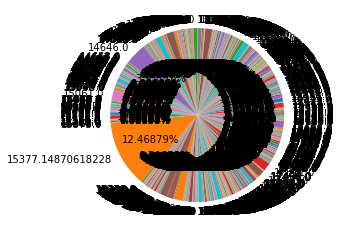

In [99]:
cat = df.groupby('CustomerID').sum()['Quantity']
cat.sort_values(ascending=False)
import matplotlib.pyplot as plt
plt.pie(cat, labels=cat.index, autopct='%.5f%%')
plt.show()

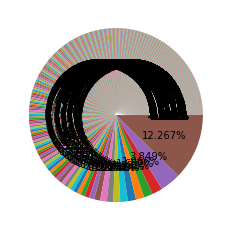

In [100]:
dog = cat.sort_values()
asdf = []
for i in dog : 
    asdf.append(i)
del asdf[0]
asdf
plt.pie(asdf, autopct='%.3f%%')
plt.show()


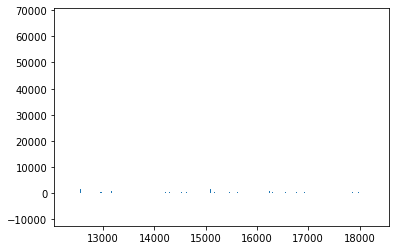

In [101]:
plt.bar(dog.index, dog)
plt.show()

In [102]:
df1.groupby('Country').sum()['Price'].sort_values(ascending=False)
df1.groupby('CustomerID').count()['InvoiceDate'].sort_values(ascending=False)
df1.groupby('CustomerID').sum()['Price'].sort_values(ascending=False)

CustomerID
15377    330002.24
12346     77183.60
18102     27834.61
14646     26702.98
15749     22998.40
           ...    
16042        24.95
17816        16.21
15823        15.00
12476        12.45
16554         0.85
Name: Price, Length: 1121, dtype: float64

In [103]:
df1['CustomerID'] = df1['CustomerID'].astype('object')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62434 entries, 0 to 63674
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    62434 non-null  object 
 1   StockCode    62434 non-null  object 
 2   Description  62434 non-null  object 
 3   Quantity     62434 non-null  int64  
 4   InvoiceDate  62434 non-null  object 
 5   Price        62434 non-null  float64
 6   UnitPrice    62434 non-null  float64
 7   CustomerID   62434 non-null  object 
 8   Country      62434 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 4.8+ MB


In [104]:
df1.corr()

,Quantity,Price,UnitPrice
Quantity,1.000000,0.967678,-0.001429
Price,0.967678,1.000000,0.177012
UnitPrice,-0.001429,0.177012,1.000000


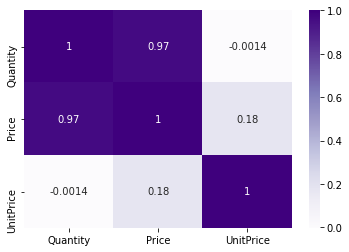

In [105]:
df1.corr()
import seaborn as sns
sns.heatmap(df1.corr(), cmap='Purples', annot=True)


# 가설 : Quantity가 증가할수록 Price는 매우 크게 증가하는 인과관계가 있을 것이다. 

In [109]:
df1.head()
df1.describe()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62434 entries, 0 to 63674
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    62434 non-null  object 
 1   StockCode    62434 non-null  object 
 2   Description  62434 non-null  object 
 3   Quantity     62434 non-null  int64  
 4   InvoiceDate  62434 non-null  object 
 5   Price        62434 non-null  float64
 6   UnitPrice    62434 non-null  float64
 7   CustomerID   62434 non-null  object 
 8   Country      62434 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 4.8+ MB


In [111]:
x = df1['Quantity']
y = df1['Price']

# 상수항 추가하기

In [118]:
import statsmodels.api as sm
x1 = sm.add_constant(x, has_constant='add')
x1

,const,Quantity
0,1.0,6
1,1.0,6
2,1.0,8
3,1.0,6
4,1.0,6
...,...,...
63669,1.0,24
63671,1.0,4
63672,1.0,12
63673,1.0,12


In [120]:
import statsmodels.api as sm
multi_model = sm.OLS(y,x1).fit()
multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 9.192e+05
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:21:32   Log-Likelihood:            -3.6348e+05
No. Observations:               62434   AIC:                         7.270e+05
Df Residuals:                   62432   BIC:                         7.270e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0690      0.327     30.783      0.000       9.428      10.710
Quantity       1.0462      0.001    958.752      0.000       1.044       1.048
==============================================================================
Omnibus:                   233401.072   Durbin-Watson:                   1.678
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     399508868751.447
Skew:                          82.486   Prob(JB):                         0.00
Kurtosis:                   12394.383   Cond. No.                         300.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Quantity가 1단위 증가할때, Price 는 1.0462 증가한다.
# Quantity와 Price 는 인과관계에 있다.

# 로지스틱 회귀분석 복습하기 

In [121]:
import pandas as pd 
import numpy as np

In [127]:
df3 = pd.read_csv('c:/bd092_data/BankPersonalLoan.csv')
df3.head()
df3.describe()
df3.head()
df3.info()
df3.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [128]:
df3.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [129]:
df3.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [132]:

df3.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


In [134]:
df3.info()
df3.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Income              5000 non-null   int64  
 2   Family              5000 non-null   int64  
 3   CCAvg               5000 non-null   float64
 4   Education           5000 non-null   int64  
 5   Mortgage            5000 non-null   int64  
 6   Personal Loan       5000 non-null   int64  
 7   Securities Account  5000 non-null   int64  
 8   CD Account          5000 non-null   int64  
 9   Online              5000 non-null   int64  
 10  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 429.8 KB


,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [138]:
df3.head()
x = df3.drop('Personal Loan', axis=1)
y = df3['Personal Loan']

In [139]:
from sklearn.model_selection import train_test_split

In [141]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=2, stratify=y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3500, 10) (1500, 10) (3500,) (1500,)


In [144]:
x_train.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
3824,23,12,4,1.0,1,0,1,0,0,1
3207,56,84,1,4.3,1,0,0,0,1,1
2551,46,43,2,2.1,3,0,1,1,1,1
3713,46,74,3,0.7,2,0,0,0,1,1
2492,28,134,2,3.1,1,0,0,0,1,0


In [166]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
x_train.iloc[:,:] = stdsc.fit_transform(x_train.iloc[:, :])
x_test.iloc[:,:] = stdsc.transform(x_test.iloc[:,:])


C:\Users\Ki beom kim\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-166-ee82576c4d28>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.iloc[:,:] = stdsc.fit_transform(x_train.iloc[:, :])
C:\Users\Ki beom kim\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._

In [171]:
import statsmodels.api as sm
logit_model = sm.Logit(y_train, x_train).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.619772
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3490
Method:                           MLE   Df Model:                            9
Date:                Sun, 01 Nov 2020   Pseudo R-squ.:                 -0.9600
Time:                        19:01:06   Log-Likelihood:                -2169.2
converged:                       True   LL-Null:                       -1106.7
Covariance Type:            nonrobust   LLR p-value:                     1.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0335      0.036      0.917      0.359      -0.038       0.105
Income                 0.6518      0.053     12.377      0.000       0.549       0.755
Family                 0.1961      0.037      5.262      0.000       0.123       0.269
CCAvg                  0.0836      0.050      1.675      0.094      -0.014       0.181
Education              0.2927      0.038      7.723      0.000       0.218       0.367
Mortgage               0.0855      0.040      2.139      0.032       0.007       0.164
Securities Account    -0.1121      0.040     -2.804      0.005      -0.190      -0.034
CD Account             0.4659      0.053      8.801      0.000       0.362       0.570
Online                -0.0541      0.037     -1.474      0.140      -0.126       0.018
CreditCard            -0.1182      0.038     -3.094      0.002      -0.193      -0.043
======================================================================================
"""

In [178]:
cat = logit_model.params
dog = np.exp(cat).sort_values(ascending=False)
dog

Income                1.919072
CD Account            1.593516
Education             1.340065
Family                1.216697
Mortgage              1.089265
CCAvg                 1.087218
Age                   1.034027
Online                0.947353
Securities Account    0.893946
CreditCard            0.888530
dtype: float64

# income이 1단위 증가할때, Personal Loan 성공집단에 속할 확률은 1.919배 증가한다 (확률이 91.9% 증가한다)

# 회귀분석 복습하기

In [181]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [185]:
df4 = pd.read_csv('c:/bd092_data/ozone.csv')
df4.head()
df4.info()
df4.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


,Ozone,Solar.R,Wind,Temp,Month,Day
count,116.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,32.987885,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,18.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,31.500000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,63.250000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [186]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


In [189]:
df4['Ozone'] = df4['Ozone'].fillna(df4['Ozone'].mean())
df4['Solar.R'] = df4['Solar.R'].fillna(df4['Solar.R'].mean())
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    153 non-null    float64
 1   Solar.R  153 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


In [190]:
df4.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,28.693372,87.960267,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,21.000000,120.000000,7.400000,72.000000,6.000000,8.000000
50%,42.129310,194.000000,9.700000,79.000000,7.000000,16.000000
75%,46.000000,256.000000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [192]:
df4.info()
df4.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    153 non-null    float64
 1   Solar.R  153 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.00000,190.000000,7.4,67,5,1
1,36.00000,118.000000,8.0,72,5,2
2,12.00000,149.000000,12.6,74,5,3
3,18.00000,313.000000,11.5,62,5,4
4,42.12931,185.931507,14.3,56,5,5


In [196]:
x = df4[['Solar.R', 'Wind', 'Temp']]
y = df4['Ozone']

In [200]:
import statsmodels.api as sm
x1 = sm.add_constant(x, has_constant='add')

In [201]:
muli_model = sm.OLS(y,x1).fit()
multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 9.192e+05
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:38:51   Log-Likelihood:            -3.6348e+05
No. Observations:               62434   AIC:                         7.270e+05
Df Residuals:                   62432   BIC:                         7.270e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0690      0.327     30.783      0.000       9.428      10.710
Quantity       1.0462      0.001    958.752      0.000       1.044       1.048
==============================================================================
Omnibus:                   233401.072   Durbin-Watson:                   1.678
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     399508868751.447
Skew:                          82.486   Prob(JB):                         0.00
Kurtosis:                   12394.383   Cond. No.                         300.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# ㅋㅋㅋ 위에꺼랑 겹쳐서 엉킴. 옮겨서 다시.